<a href="https://colab.research.google.com/github/Sheetalm21/deep_learning/blob/assignment_4/Assessment04_ques02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sheetal Mahajan_20MAI0066

### 1. Load the libraries

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

### 2. Load the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# modify to fit your system
fpath = '/content/drive/MyDrive/Colab Notebooks/datasets/Dog_breeds'

### 3. Exploratory Data Analysis

In [4]:
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02115641-dingo', 'n02113799-standard_poodle', 'n02112706-Brabancon_griffon', 'n02113712-miniature_poodle', 'n02113186-Cardigan', 'n02113023-Pembroke', 'n02115913-dhole', 'n02116738-African_hunting_dog', 'n02113624-toy_poodle', 'n02113978-Mexican_hairless', 'n02110806-basenji', 'n02110627-affenpinscher', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02111129-Leonberg', 'n02112350-keeshond', 'n02111277-Newfoundland', 'n02112137-chow', 'n02112018-Pomeranian', 'n02110958-pug'] 

No. of categories =  20


In [5]:
# Display the total images in the database, size of the image, no of classes in the database
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  3552 
No. of labels loaded =  3552
<class 'list'> <class 'list'>


In [6]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3552, 227, 227, 3) 
Labels shape =  (3552,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


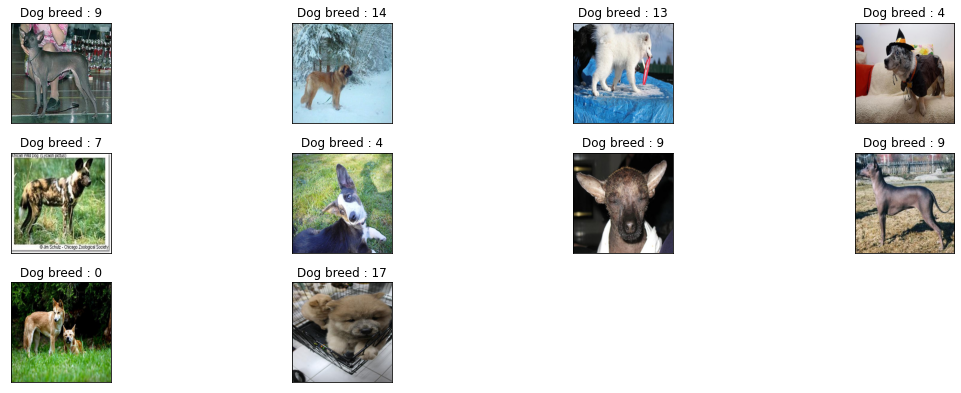

In [7]:
#Display sample input and output images (at least 10 images).
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 9))
    n = 0 
    for i in range(10):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

### 4. Preparing data for VGG-16 CNN model

In [8]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3549 3550 3551]

'n' values after shuffling =  [ 299 1017 2071 ...  860 3507 3174]


In [9]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3552, 227, 227, 3) 
Labels shape after shuffling =  (3552,)


In [10]:
#Data Normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3552, 227, 227, 3)


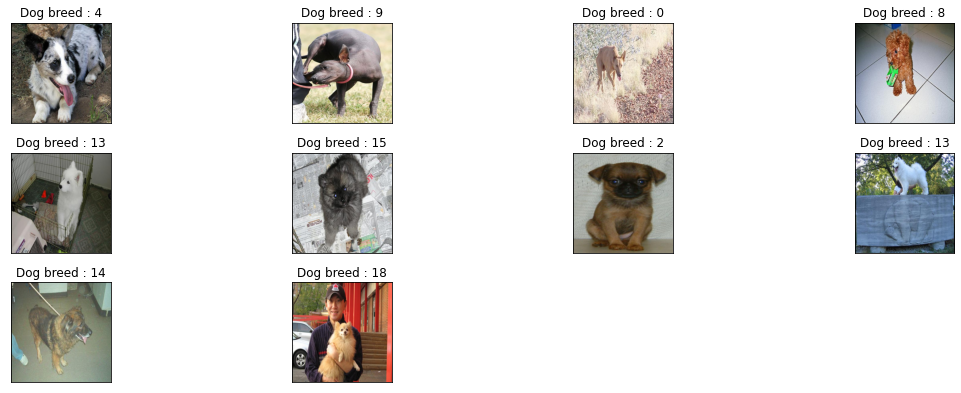

In [11]:
#Display few images after normalization
display_rand_images(images, labels)

In [12]:
#Split loaded dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2841, 227, 227, 3)
y_train shape =  (2841,)

x_test shape =  (711, 227, 227, 3)
y_test shape =  (711,)


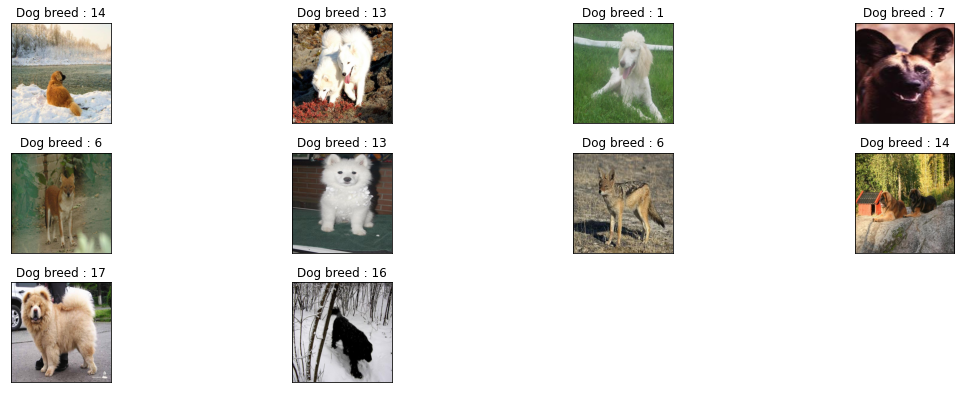

In [13]:
#Display train random images
display_rand_images(x_train, y_train)

### Define VGG16 CNN model

In [14]:
from keras.layers import MaxPool2D
def VGG16():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(Dense(128, activation='relu', name='fc2'))
    model.add(Dense(1, activation='sigmoid', name='output'))
    return model

In [15]:
model=VGG16()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0

In [17]:
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [18]:
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

### 6. Train the Model

In [24]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
89/89 [==============================] - 36s 402ms/step - loss: nan - accuracy: 0.0440
Epoch 2/50
89/89 [==============================] - 36s 400ms/step - loss: nan - accuracy: 0.0440
Epoch 3/50
89/89 [==============================] - 35s 397ms/step - loss: nan - accuracy: 0.0440
Epoch 4/50
89/89 [==============================] - 36s 400ms/step - loss: nan - accuracy: 0.0440
Epoch 5/50
89/89 [==============================] - 36s 399ms/step - loss: nan - accuracy: 0.0440
Epoch 6/50
89/89 [==============================] - 35s 398ms/step - loss: nan - accuracy: 0.0440
Epoch 7/50
89/89 [==============================] - 36s 399ms/step - loss: nan - accuracy: 0.0440
Epoch 8/50
89/89 [==============================] - 35s 399ms/step - loss: nan - accuracy: 0.0440
Epoch 9/50
89/89 [==============================] - 35s 399ms/step - loss: nan - accuracy: 0.0440
Epoch 10/50
89/89 [==============================] - 35s 398ms/step - loss: nan - accuracy: 0.0440
Epoch 11/50
89/89 [

In [25]:
#Metrics to evalvuate Loss and accuracy
loss, accuracy = model.evaluate(x_test, y_test)

23/23 [==============================] - 3s 120ms/step - loss: nan - accuracy: 0.0478


In [26]:
pred = model.predict(x_test)
pred.shape

(711, 1)